In [1]:
from imblearn.over_sampling import SMOTE

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv("train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

C:\Users\ROOT\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Survived', ylabel='count'>

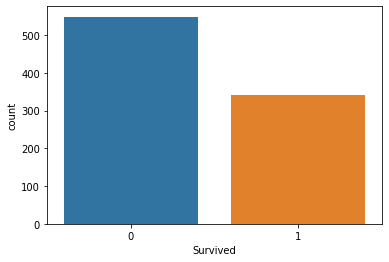

In [4]:
sns.countplot(data['Survived'])

([<matplotlib.patches.Wedge at 0x1ff170273c8>,
 [Text(-0.3925749350994583, 1.0275626113924428, '0'),
  Text(0.3925750313068116, -1.0275625746369201, '1')],
 [Text(-0.21413178278152267, 0.5604886971231505, '61.6'),
  Text(0.21413183525826085, -0.5604886770746836, '38.4')])

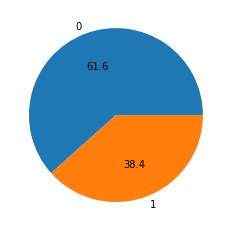

In [14]:
plt.pie(data['Survived'].value_counts(),labels=['0','1'],autopct="%0.1f")

In [29]:
data1=data.copy()

In [30]:
data1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [31]:
data1.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [34]:
data1

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,0,0,111369,30.0000,C


In [35]:
data_new=data1.dropna(axis=0,how='any',inplace=True)

In [36]:
data_new.head()

AttributeError: 'NoneType' object has no attribute 'head'

In [39]:
data1.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [40]:
data3=data1

In [42]:
data3.isnull().mean()

PassengerId    0.0
Survived       0.0
Pclass         0.0
Name           0.0
Sex            0.0
SibSp          0.0
Parch          0.0
Ticket         0.0
Fare           0.0
Embarked       0.0
dtype: float64

In [4]:
pip install category_encoders

     --------------------------------------- 69.1/69.1 kB 32.4 kB/s eta 0:00:00

[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [6]:
data.drop(['PassengerId','Name','Ticket'],axis=1)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,NaN,S
887,1,1,female,19.0,0,0,30.0000,B42,S
888,0,3,female,NaN,1,2,23.4500,NaN,S
889,1,1,male,26.0,0,0,30.0000,C148,C


In [61]:
data.Cabin.dtype

dtype('O')

In [37]:
data.Age.mode()

0    24.0
dtype: float64

In [51]:
med=data.Age.median()
med

28.0

In [54]:
data['Age']=data['Age'].fillna(median)

In [55]:
data.head()

,Survived,Age,Cabin
0,0,28.0,NaN
1,1,28.0,C85
2,1,28.0,NaN
3,1,28.0,C123
4,0,28.0,NaN


In [66]:
def impute_nan(data,feature,median):  
    median=data[feature].median()  
    data[feature]=data[feature].fillna(median)
    data['new']=np.where(data[feature].isnull(),1,0)

In [67]:
impute_nan(data,'Age',median)

In [68]:
data.head()

,Survived,Age,Cabin,Age_new,new
0,0,28.0,NaN,0,0
1,1,28.0,C85,0,0
2,1,28.0,NaN,0,0
3,1,28.0,C123,0,0
4,0,28.0,NaN,0,0


In [ ]:
data['Age']=data['Age'].fillna(data['Age']).mode()[0]

In [31]:
data.head()

,Survived,Age,Cabin
0,0,None,NaN
1,1,None,C85
2,1,None,NaN
3,1,None,C123
4,0,None,NaN


In [16]:
data.isnull().sum()

Survived      0
Age         891
Cabin       687
dtype: int64

In [3]:
data.isnull().sum()

Survived      0
Age         177
Cabin       687
dtype: int64

In [46]:
median=data.Age.median()
median

28.0

In [48]:
data['Age']=data['Age'].fillna(median)                               

In [50]:
data.head()

,Survived,Age,Cabin
0,0,22.0,NaN
1,1,38.0,C85
2,1,26.0,NaN
3,1,35.0,C123
4,0,35.0,NaN


In [7]:
impute_nan(data,'Age',median)

In [8]:
data.head()

,Survived,Age,Cabin,Age_median
0,0,22.0,NaN,22.0
1,1,38.0,C85,38.0
2,1,26.0,NaN,26.0
3,1,35.0,C123,35.0
4,0,35.0,NaN,35.0


In [12]:
data.shape

(891, 4)

In [11]:
data.Age_median.shape

(891,)

In [13]:
data.Age_median.isnull().sum()

0

In [16]:
data.Age.mode()[0]

24.0

Text(0.5, 0, 'age')

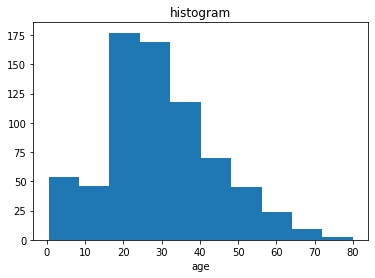

In [22]:
plt.hist(data['Age'])
plt.title('histogram')
plt.xlabel('age')

In [24]:
data.shape

(891, 4)

In [25]:
data.Cabin.isnull().sum()

687

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Age         714 non-null    float64
 2   Cabin       204 non-null    object 
 3   Age_median  891 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 28.0+ KB


In [30]:
data.Age.dropna().sample()

675    18.0
Name: Age, dtype: float64

In [31]:
data.Age.dropna().sample(data.Age.isnull().sum(),random_state=0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [33]:
data.Age.isnull().sum()

177

In [ ]:
data[feature]

In [41]:
def impute_nan(data,feature,median):
    data[feature+'_mediam']=data[feature].fillna(median)
    data[feature+'_random']=data[feature]
    random_sample=data[feature].dropna().sample(data[feature].isnull().sum(),random_state=0)
    random_sample.index=data[data[feature].isnull()].index
    data.loc[data[feature].isnull(),feature+'_random']=random_sample

In [42]:
impute_nan(data,'Age',median)

In [44]:
data.head()

,Survived,Age,Cabin,Age_median,Age_mediam,Age_random
0,0,22.0,NaN,22.0,22.0,22.0
1,1,38.0,C85,38.0,38.0,38.0
2,1,26.0,NaN,26.0,26.0,26.0
3,1,35.0,C123,35.0,35.0,35.0
4,0,35.0,NaN,35.0,35.0,35.0


In [38]:
data.describe(include=object)

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [45]:
def impute_nan(data,feature):
    data[feature+'_random']=data[feature]
    random_sample=data[feature].dropna().sample(data[feature].isnull().sum(),random_state=0)
    random_sample.index=data[data[feature].isnull()].index
    data.loc[data[feature].isnull(),feature+'_random']=random_sample

In [46]:
impute_nan(data,'Age')

In [48]:
data.head()

,Survived,Age,Cabin,Age_median,Age_mediam,Age_random
0,0,22.0,NaN,22.0,22.0,22.0
1,1,38.0,C85,38.0,38.0,38.0
2,1,26.0,NaN,26.0,26.0,26.0
3,1,35.0,C123,35.0,35.0,35.0
4,0,35.0,NaN,35.0,35.0,35.0


In [50]:
data1=pd.read_csv("train.csv",usecols=['Age','Survived','Cabin'])
data1.head()

,Survived,Age,Cabin
0,0,22.0,NaN
1,1,38.0,C85
2,1,26.0,NaN
3,1,35.0,C123
4,0,35.0,NaN


In [51]:
def impute_nan(data,feature):
    data[feature+'_random']=data[feature]
    random_sample=data[feature].dropna().sample(data[feature].isnull().sum(),random_state=0)
    random_sample.index=data[data[feature].isnull()].index
    data.loc[data[feature].isnull(),feature+'_random']=random_sample

In [54]:
impute_nan(data1,'Age')

In [55]:
data1.head()

,Survived,Age,Cabin,Age_random
0,0,22.0,NaN,22.0
1,1,38.0,C85,38.0
2,1,26.0,NaN,26.0
3,1,35.0,C123,35.0
4,0,35.0,NaN,35.0


In [57]:
data1['Age'].fillna(data['Age'].median())

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

<AxesSubplot:>

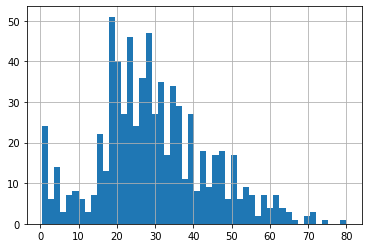

In [58]:
data.Age.hist(bins=50)

C:\Users\ROOT\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1220: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\Users\ROOT\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1227: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
C:\Users\ROOT\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1235: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
C:\Users\ROOT\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1236: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


{'whiskers': [<matplotlib.lines.Line2D at 0x161d3333708>,
 'caps': [<matplotlib.lines.Line2D at 0x161d3356288>,
 'boxes': [<matplotlib.lines.Line2D at 0x161d3350748>],
 'medians': [<matplotlib.lines.Line2D at 0x161d335d048>],
 'fliers': [<matplotlib.lines.Line2D at 0x161d3356c08>],
 'means': []}

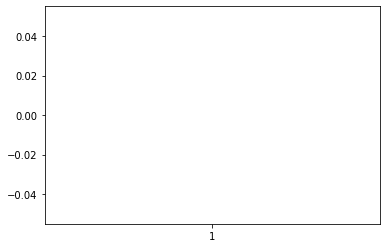

In [65]:
plt.boxplot(data['Age'])

C:\Users\ROOT\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Age'>

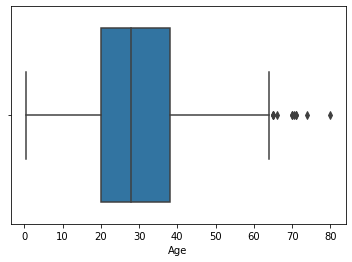

In [64]:
sns.boxplot('Age',data=data)

In [75]:
data.Age.mean()

29.69911764705882

In [74]:
extreme=data.Age.mean()+3*data.Age.std()
extreme

73.27860964406095

In [71]:
def impute_nan(data1,feature,extreme):
    data1[feature+'_end_distribution']=data1[feature].fillna(extreme)

In [72]:
impute_nan(data1,'Age',extreme)

In [73]:
data1.head()

,Survived,Age,Cabin,Age_random,Age_end_distribution
0,0,22.0,NaN,22.0,22.0
1,1,38.0,C85,38.0,38.0
2,1,26.0,NaN,26.0,26.0
3,1,35.0,C123,35.0,35.0
4,0,35.0,NaN,35.0,35.0


<AxesSubplot:>

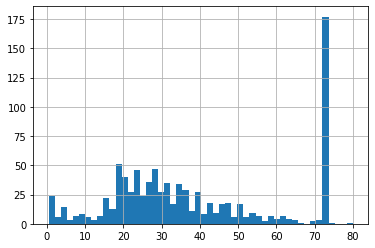

In [77]:
data['Age_end_distribution'].hist(bins=50)

C:\Users\ROOT\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Age_end_distribution'>

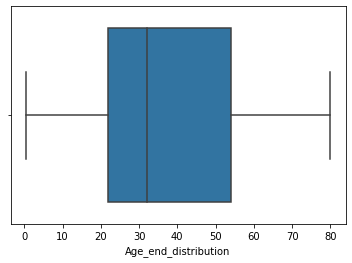

In [78]:
sns.boxplot("Age_end_distribution",data=data)

In [82]:
data2=pd.read_csv(r'C:\Users\ROOT\Downloads\house price.csv')
pd.set_option('display.max_columns',None)
data2

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,Gas

In [83]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [84]:
data2.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [85]:
data2.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [86]:
data2.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [7]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [32]:
data_new=data.drop(['PassengerId','Name','Ticket'],axis=1)

In [33]:
data_new

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,NaN,S
887,1,1,female,19.0,0,0,30.0000,B42,S
888,0,3,female,NaN,1,2,23.4500,NaN,S
889,1,1,male,26.0,0,0,30.0000,C148,C


In [7]:
data_new.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [12]:
data_new.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [72]:
data_new.Sex.unique()

array(['male', 'female'], dtype=object)

In [34]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data_new.Sex=le.fit_transform(data['Sex'])

In [35]:
data_new.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,22.0,1,0,7.2500,NaN,S
1,1,1,0,38.0,1,0,71.2833,C85,C
2,1,3,0,26.0,0,0,7.9250,NaN,S
3,1,1,0,35.0,1,0,53.1000,C123,S
4,0,3,1,35.0,0,0,8.0500,NaN,S


In [31]:
data_new.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [36]:
data_new.drop('Cabin',axis=1,inplace=True)

In [76]:
data_new.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [23]:
df=pd.get_dummies(data_new['Embarked'],drop_first=True)

In [37]:
data_new

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,S
887,1,1,0,19.0,0,0,30.0000,S
888,0,3,0,NaN,1,2,23.4500,S
889,1,1,1,26.0,0,0,30.0000,C


In [25]:
df

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [26]:
data_new=data_new.drop('Embarked',axis=1)
data_new=pd.concat([data_new,df],axis=1)
data_new.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
0,0,3,1,22.0,1,0,7.2500,0,1
1,1,1,0,38.0,1,0,71.2833,0,0
2,1,3,0,26.0,0,0,7.9250,0,1
3,1,1,0,35.0,1,0,53.1000,0,1
4,0,3,1,35.0,0,0,8.0500,0,1


In [67]:
data_new_1

array([[0.        , 1.        , 1.        , ..., 0.01415106, 0.        ,
        1.        ],
       [1.        , 0.        , 0.        , ..., 0.13913574, 0.        ,
        0.        ],
       [1.        , 1.        , 0.        , ..., 0.01546857, 0.        ,
        1.        ],
       ...,
       [0.        , 1.        , 0.        , ..., 0.04577135, 0.        ,
        1.        ],
       [1.        , 0.        , 1.        , ..., 0.0585561 , 0.        ,
        0.        ],
       [0.        , 1.        , 1.        , ..., 0.01512699, 1.        ,
        0.        ]])

In [27]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
data_new=pd.DataFrame(scaler.fit_transform(data_new),columns=data_new.columns)

In [28]:
data_new

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
0,0.0,1.0,1.0,0.271174,0.125,0.000000,0.014151,0.0,1.0
1,1.0,0.0,0.0,0.472229,0.125,0.000000,0.139136,0.0,0.0
2,1.0,1.0,0.0,0.321438,0.000,0.000000,0.015469,0.0,1.0
3,1.0,0.0,0.0,0.434531,0.125,0.000000,0.103644,0.0,1.0
4,0.0,1.0,1.0,0.434531,0.000,0.000000,0.015713,0.0,1.0
...,...,...,...,...,...,...,...,...,...
886,0.0,0.5,1.0,0.334004,0.000,0.000000,0.025374,0.0,1.0
887,1.0,0.0,0.0,0.233476,0.000,0.000000,0.058556,0.0,1.0
888,0.0,1.0,0.0,NaN,0.125,0.333333,0.045771,0.0,1.0
889,1.0,0.0,1.0,0.321438,0.000,0.000000,0.058556,0.0,0.0


In [31]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float64
 1   Pclass    891 non-null    float64
 2   Sex       891 non-null    float64
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    float64
 5   Parch     891 non-null    float64
 6   Fare      891 non-null    float64
 7   Q         891 non-null    float64
 8   S         891 non-null    float64
dtypes: float64(9)
memory usage: 62.8 KB


In [29]:
from sklearn.impute import KNNImputer
imputer=KNNImputer(n_neighbors=5)
data_old=pd.DataFrame(imputer.fit_transform(data_new['Embarked']))
data_old

KeyError: 'Embarked'

In [92]:
data_old.columns=data_new.columns

In [93]:
data_old.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
0,0.0,1.0,1.0,0.271174,0.125,0.0,0.014151,0.0,1.0
1,1.0,0.0,0.0,0.472229,0.125,0.0,0.139136,0.0,0.0
2,1.0,1.0,0.0,0.321438,0.000,0.0,0.015469,0.0,1.0
3,1.0,0.0,0.0,0.434531,0.125,0.0,0.103644,0.0,1.0
4,0.0,1.0,1.0,0.434531,0.000,0.0,0.015713,0.0,1.0


In [13]:
data_old.isnull().sum()

NameError: name 'data_old' is not defined

In [8]:
na_variables = [ var for var in data_new.columns if data_new[var].isnull().mean() > 0 ]
na_variables

['Age', 'Cabin', 'Embarked']

In [16]:
from category_encoders import TargetEncoder
tar=TargetEncoder()

C:\Users\ROOT\anaconda3\lib\site-packages\category_encoders\target_encoder.py:94: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)
C:\Users\ROOT\anaconda3\lib\site-packages\category_encoders\target_encoder.py:99: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)


In [17]:
(numpy.__version__)

ValueError: Length of values (1) does not match length of index (891)

In [41]:
data_new.drop('Age',axis=)

In [54]:
data_new.dropna(axis=0,inplace=True)

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [43]:
from category_encoders import TargetEncoder
tar=TargetEncoder()

C:\Users\ROOT\anaconda3\lib\site-packages\category_encoders\target_encoder.py:94: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)
C:\Users\ROOT\anaconda3\lib\site-packages\category_encoders\target_encoder.py:99: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)


In [55]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    int32  
 3   SibSp     889 non-null    int64  
 4   Parch     889 non-null    int64  
 5   Fare      889 non-null    float64
 6   Embarked  889 non-null    object 
dtypes: float64(1), int32(1), int64(4), object(1)
memory usage: 52.1+ KB


In [56]:
data_old=tar.fit_transform(data_new['Embarked'],y='Survived')

ValueError: Length of values (1) does not match length of index (889)

In [1]:
from feature_engine.encoding import WOEEncoder

ImportError: cannot import name 'WOEEncoder' from 'feature_engine.encoding' (C:\Users\ROOT\anaconda3\lib\site-packages\feature_engine\encoding\__init__.py)

In [21]:
from category_encoders import WOEEncoder
woe=WOEEncoder()

In [51]:
data2=woe.fit_transform(data3['Embarked'],y='Survived')

ValueError: Length of values (1) does not match length of index (889)

In [48]:
data3.Survived.shape

(889,)

In [49]:
data3.Embarked.shape

(889,)

In [57]:
for features in data3.feature: 
    if [data3.Survived.index==data3.Embarked.index] 
    print('hello')

SyntaxError: invalid syntax (<ipython-input-57-d8b748592255>, line 2)

In [54]:
data3.Embarked.index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            881, 882, 883, 884, 885, 886, 887, 888, 889, 890],
           dtype='int64', length=889)

In [59]:
from category_encoders import MEstimateEncoder
me=MEstimateEncoder()

In [60]:
from category_encoders import JamesSteinEncoder
jse=JamesSteinEncoder()

In [62]:
from category_encoders import HashingEncoder
he=HashingEncoder()

In [65]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [66]:
data1=data.drop(['PassengerId','Survived','Name','Age','Cabin'],axis=1)

In [67]:
data1.head()

,Pclass,Sex,SibSp,Parch,Ticket,Fare,Embarked
0,3,male,1,0,A/5 21171,7.2500,S
1,1,female,1,0,PC 17599,71.2833,C
2,3,female,0,0,STON/O2. 3101282,7.9250,S
3,1,female,1,0,113803,53.1000,S
4,3,male,0,0,373450,8.0500,S


In [68]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   SibSp     891 non-null    int64  
 3   Parch     891 non-null    int64  
 4   Ticket    891 non-null    object 
 5   Fare      891 non-null    float64
 6   Embarked  889 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 48.9+ KB


In [69]:
data2=he.fit_transform(data1['Embarked'],n_components=2)

In [70]:
data2.head()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7
0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,1,0


In [72]:
data3=he.fit_transform(data['Cabin'])

In [73]:
data3.head()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7
0,1,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0
2,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0
4,1,0,0,0,0,0,0,0


In [3]:
from sklearn.preprocessing import FunctionTransformer

In [17]:
fnt=FunctionTransformer(lambda x: np.log(x))

In [18]:
data1=fnt.fit_transform(data['Fare'])

C:\Users\ROOT\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [19]:
data1.head()

0    1.981001
1    4.266662
2    2.070022
3    3.972177
4    2.085672
Name: Fare, dtype: float64

In [16]:
data['Fare'].head()

0     7.2500
1    71.2833
2     7.9250
3    53.1000
4     8.0500
Name: Fare, dtype: float64

In [3]:
import scipy.stats as stat
from sklearn.preprocessing import PowerTransformer

In [4]:
pt=PowerTransformer(method='yeo-johnson')

In [5]:
ptt=PowerTransformer(method='box-cox')

In [1]:
from category_encoders import OrdinalEncoder
ordinal=OrdinalEncoder()

In [8]:
data['Sex'].unique()

array(['male', 'female'], dtype=object)

In [9]:
data.Sex.isnull().sum()

0

In [15]:
order=[{'col':'Sex', 'mapping':{'male':1,'female':2}}]

In [16]:
order1=[{'mapping1':{'male':1,'female':2}}]

In [17]:
data_new=ordinal.fit_transform(data['Sex'],mapping=order)

In [18]:
data_new

,Sex
0,1
1,2
2,2
3,2
4,1
...,...
886,1
887,2
888,2
889,1


In [ ]:
norm=preprocessing

In [2]:
from sklearn.preprocessing import LabelEncoder  
label=LabelEncoder()

In [19]:
import pandas as pd
import sklearn

In [20]:
bank=pd.read_excel("Bank Marketing Dataset.xlsx")

In [21]:
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [32]:
bank.job.unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'], dtype=object)

In [34]:
from category_encoders import HelmertEncoder

In [35]:
helmert=HelmertEncoder()

In [36]:
bank_new=helmert.fit_transform(bank['job'])

In [39]:
bank_new.head(20)

,intercept,job_0,job_1,job_2,job_3,job_4,job_5,job_6,job_7,job_8,job_9,job_10
0,1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
1,1,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2,1,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
3,1,0.0,2.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
4,1,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
5,1,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
6,1,0.0,2.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
7,1,0.0,0.0,3.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
8,1,0.0,0.0,0.0,4.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
9,1,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [40]:
bank.head(20)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [41]:
bank.job.value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [50]:
bank.groupby(['job','y']).size()

job            y  
admin.         no     9070
               yes    1352
blue-collar    no     8616
               yes     638
entrepreneur   no     1332
               yes     124
housemaid      no      954
               yes     106
management     no     2596
               yes     328
retired        no     1286
               yes     434
self-employed  no     1272
               yes     149
services       no     3646
               yes     323
student        no      600
               yes     275
technician     no     6013
               yes     730
unemployed     no      870
               yes     144
unknown        no      293
               yes      37
dtype: int64

In [51]:
from category_encoders import SumEncoder

In [52]:
sume=SumEncoder()
data_1=sume.fit_transform(bank['job'])
data_1.head(20)

,intercept,job_0,job_1,job_2,job_3,job_4,job_5,job_6,job_7,job_8,job_9,job_10
0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [54]:
data_1.nunique()

intercept    1
job_0        3
job_1        3
job_2        3
job_3        3
job_4        3
job_5        3
job_6        3
job_7        3
job_8        3
job_9        3
job_10       3
dtype: int64

In [2]:
import pandas as pd
import numpy as np
import sklearn
import category_encoders as ce

In [17]:
import warnings
warnings.filterwarnings('ignore')

In [27]:
%%time
import gc
from sklearn.metrics import roc_auc_score as auc
from sklearn.linear_model import LogisticRegression

Wall time: 862 ms


In [3]:
pd.set_option('display.max_columns',21)

In [4]:
data=pd.read_excel("Bank Marketing Dataset.xlsx")
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
x=data.loc[:,'age':'nr.employed']
y=data['y']

In [6]:
x.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0


In [7]:
y.head()

0    no
1    no
2    no
3    no
4    no
Name: y, dtype: object

In [8]:
from sklearn.model_selection import train_test_split

In [14]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3)

In [15]:
xtrain.shape,ytrain.shape,xtest.shape,ytest.shape

((28831, 20), (28831,), (12357, 20), (12357,))

In [68]:
ye=y.copy()

In [69]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [75]:
yye=le.fit_transform(ye)

In [76]:
yee=pd.DataFrame(yye)

In [49]:
ye.index=y.index

In [77]:
yee.head()

,0
0,0
1,0
2,0
3,0
4,0


In [14]:
%%time
import gc
from sklearn.metrics import roc_auc_score as auc
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import category_encoders as ce

Wall time: 0 ns


In [78]:
x_train,x_test,y_train,y_test=train_test_split(x,yee,test_size=0.3,random_state=50)

In [21]:
oe=ce.OneHotEncoder()
ore=ce.OrdinalEncoder()
coe=ce.CountEncoder()
se=ce.SumEncoder()
be=ce.BinaryEncoder()
he=ce.HashingEncoder()
hel=ce.HelmertEncoder()
te=ce.TargetEncoder()
woe=ce.WOEEncoder()
me=ce.MEstimateEncoder()
je=ce.JamesSteinEncoder()
cat=ce.CatBoostEncoder()

In [61]:
encoder_list=[oe,ore,coe,se,be,he,hel,te,woe,me,je,cat]

In [79]:
 for encoder in encoder_list:  
      print("Test {} : ".format(str(encoder).split('(')[0]), end=" ")  
      x_train_enc = encoder.fit_transform(x_train,y_train) 
      x_test_enc = encoder.transform(x_test)  
      lr = LogisticRegression(C=0.1, solver="lbfgs", max_iter=1000)  
      lr.fit(x_train_enc, y_train)  
      lr_pred = lr.predict_proba(x_test_enc)[:, 1]  
      score = auc(y_test, lr_pred)    
      print("score: ", score)     
      gc.collect()

Test OneHotEncoder :  score:  0.9277247628668175
Test OrdinalEncoder :  score:  0.9197335245571684
Test CountEncoder :  score:  0.9242906301979487
Test SumEncoder :  score:  0.9275180562215887
Test BinaryEncoder :  score:  0.9252451997832495
Test HashingEncoder :  score:  0.9191956420451138
Test HelmertEncoder :  score:  0.9281847948241757
Test TargetEncoder :  score:  0.9147381903523978
Test WOEEncoder :  score:  0.9266987593410843
Test MEstimateEncoder :  score:  0.9158856512195627
Test JamesSteinEncoder :  score:  0.914394312208355
Test CatBoostEncoder :  score:  0.9137594602501224


In [ ]:
%%time
from sklearn.model_selection import KFold
import numpy as np

# CV function original : @Peter Hurford : Why Not Logistic Regression? https://www.kaggle.com/peterhurford/why-not-logistic-regression

def run_cv_model(train, test, target, model_fn, params={}, label='model'):
    kf = KFold(n_splits=5)
    fold_splits = kf.split(train, target)

    cv_scores = []
    pred_full_test = 0
    pred_train = np.zeros((train.shape[0]))
    i = 1
    for dev_index, val_index in fold_splits:
        print('Started {} fold {}/5'.format(label, i))
        dev_X, val_X = train.iloc[dev_index], train.iloc[val_index]
        dev_y, val_y = target[dev_index], target[val_index]
        pred_val_y, pred_test_y = model_fn(dev_X, dev_y, val_X, val_y, test, params)
        pred_full_test = pred_full_test + pred_test_y
        pred_train[val_index] = pred_val_y
        cv_score = auc(val_y, pred_val_y)
        cv_scores.append(cv_score)
        print(label + ' cv score {}: {}'.format(i, cv_score))
        i += 1
        
    print('{} cv scores : {}'.format(label, cv_scores))
    print('{} cv mean score : {}'.format(label, np.mean(cv_scores)))
    print('{} cv std score : {}'.format(label, np.std(cv_scores)))
    pred_full_test = pred_full_test / 5.0
    results = {'label': label, 'train': pred_train, 'test': pred_full_test, 'cv': cv_scores}
    return results


def runLR(train_X, train_y, test_X, test_y, test_X2, params):
    model = LogisticRegression(**params)
    model.fit(train_X, train_y)
    pred_test_y = model.predict_proba(test_X)[:, 1]
    pred_test_y2 = model.predict_proba(test_X2)[:, 1]
    return pred_test_y, pred_test_y2

In [130]:
import pandas as pd
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

In [131]:
from sklearn.linear_model import LinearRegression

In [1]:
import pandas as pd

In [70]:
train=pd.read_csv("train.csv",usecols=['Embarked','Sex','Survived','Cabin','Ticket','Pclass'])

In [71]:
train.head()

,Survived,Pclass,Sex,Ticket,Cabin,Embarked
0,0,3,male,A/5 21171,NaN,S
1,1,1,female,PC 17599,C85,C
2,1,3,female,STON/O2. 3101282,NaN,S
3,1,1,female,113803,C123,S
4,0,3,male,373450,NaN,S


In [72]:
train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Ticket        0
Cabin       687
Embarked      2
dtype: int64

In [134]:
x=train.loc[:,['Pclass','Sex','Age','Embarked']]
y=train['Survived']

In [135]:
x.isnull().sum()

Pclass        0
Sex           0
Age         177
Embarked      2
dtype: int64

In [25]:
train.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [148]:
train.Cabin.fillna(method='ffill',inplace=True)

In [149]:
train.Embarked.fillna(value='S',inplace=True)

In [139]:
x.isnull().sum()

Pclass      0
Sex         0
Age         0
Embarked    0
dtype: int64

In [140]:
x.head()

,Pclass,Sex,Age,Embarked
0,3,male,22.0,S
1,1,female,38.0,C
2,3,female,26.0,S
3,1,female,35.0,S
4,3,male,35.0,S


In [151]:
col_trans=make_column_transformer((OneHotEncoder(),['Sex','Embarked']),remainder='passthrough')

In [143]:
linreg=LinearRegression()

In [144]:
pipe=make_pipeline(col_trans,linreg)

In [157]:
cross_val_score(pipe,x,y,cv=10,scoring='max_error').mean()

-0.9569650344963415

In [154]:
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [32]:
from sklearn.compose import ColumnTransformer
from category_encoders import OneHotEncoder
from category_encoders import OrdinalEncoder
from sklearn.impute import SimpleImputer
from category_encoders import CountEncoder

In [59]:
cnt=CountEncoder()
ode=OrdinalEncoder()

In [60]:
col_trans=ColumnTransformer(transformers=[
          ('tnf1',cnt(['Embarked','Cabin','Ticket'])),
          ('tnf2',ode(cols=['Sex']))],remainder='passthrough')

TypeError: 'CountEncoder' object is not callable

In [83]:
cols1=['Embarked','Cabin','Ticket']
cols2=['Sex']
cols11=['Embarked']

In [61]:
col_trans=ColumnTransformer([
          ('count',cnt,cols1),
          ('ord',ode,cols2)],remainder='passthrough')

In [62]:
col_trans.fit_transform(train)

array([[644, 687,   1,   1,   0,   3],
       [168,   1,   1,   2,   1,   1],
       [644, 687,   1,   2,   1,   3],
       ...,
       [644, 687,   2,   2,   0,   3],
       [168,   1,   1,   1,   1,   1],
       [ 77, 687,   1,   1,   0,   3]], dtype=int64)

In [17]:
train.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [ ]:
OneHotEncoder()

In [63]:
train.shape

(891, 6)

In [67]:
from category_encoders import OneHotEncoder

In [68]:
from sklearn.impute import SimpleImputer

In [86]:
ohe=OneHotEncoder()
sim=SimpleImputer(strategy='most_frequent')
cnt=CountEncoder()
ode=OrdinalEncoder()

In [87]:
col_trans=ColumnTransformer(transformers=[
    ('tnf1',sim,cols11),
    ('tnf2',ohe,cols1),
    ('tnf3',ode,cols2)],remainder='passthrough')

In [88]:
col_trans.fit_transform(train)

array([['S', 1, 0, ..., 1, 0, 3],
       ['C', 0, 1, ..., 2, 1, 1],
       ['S', 1, 0, ..., 2, 1, 3],
       ...,
       ['S', 1, 0, ..., 2, 0, 3],
       ['C', 0, 1, ..., 1, 1, 1],
       ['Q', 0, 0, ..., 1, 0, 3]], dtype=object)

In [178]:
%%time
import gc
from sklearn.metrics import roc_auc_score as auc
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
import category_encoders as ce
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

Wall time: 0 ns


In [147]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [154]:
x=train.loc[:,['Pclass','Embarked','Cabin','Sex','Fare']]
y=train['Survived']

In [195]:
yee=pd.DataFrame(y)

In [196]:
x_train,x_test,y_train,y_test=train_test_split(x,yee,test_size=0.3,random_state=50)

In [197]:
le=LabelEncoder()
ore=ce.OrdinalEncoder()
coe=ce.CountEncoder()
se=ce.SumEncoder()
be=ce.BinaryEncoder()
he=ce.HashingEncoder()
hel=ce.HelmertEncoder()

In [198]:
encoder_list=[le,ore,coe,se,be,he,hel]

In [199]:
skfold_validation=StratifiedKFold(n_splits=10)
kfold_validation=KFold(n_splits=10)

In [200]:
y_train.shape

(623, 1)

In [201]:
x_test.shape

(268, 5)

In [203]:
for encoder in encoder_list:
    print("Test {} : ".format(str(encoder).split('(')[0]), end=" ")
    x_train_enc = encoder.fit_transform(x_train)
    x_test_enc = encoder.transform(x_test)
    lr = LogisticRegression(C=0.1, solver="lbfgs")
    lr.fit(x_train_enc,y_train)
    lr_pred = lr.predict_proba(x_test_enc)
    scores = cross_val_score(lr,x,y,cv=10,scoring='accuracy')
    print("score: ", scores)
    gc.collect()

Test LabelEncoder :  

ValueError: y should be a 1d array, got an array of shape (623, 5) instead.

In [188]:
x_train.dtypes

Pclass        int64
Embarked     object
Cabin        object
Sex          object
Fare        float64
dtype: object

In [164]:
x_test.head()

,Pclass,Embarked,Cabin,Sex,Fare
558,1,S,E67,female,79.6500
547,2,C,C86,male,13.8625
494,3,S,C30,male,8.0500
679,1,C,B51 B53 B55,male,512.3292
7,3,S,E46,male,21.0750


In [168]:
x_train.Cabin.fillna(value='E73',inplace=True)

In [170]:
x_train.isnull().sum()

Pclass      0
Embarked    0
Cabin       0
Sex         0
Fare        0
dtype: int64

In [186]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((623, 5), (268, 5), (623,), (268,))

In [238]:
import pandas as pd  
from sklearn.compose import make_column_transformer  
from sklearn.preprocessing import OneHotEncoder  
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline    
from sklearn.model_selection import cross_val_score 

In [205]:
train=pd.read_csv('train.csv')

In [208]:
x=train.loc[:,['Pclass','Sex','Age','Embarked']]  
y=train['Survived']    

In [236]:
col_trans=make_column_transformer((OneHotEncoder(),['Sex','Embarked']),remainder='passthrough')  

In [239]:
linreg=LogisticRegression()    
pipe=make_pipeline(col_trans,linreg)  
cross_val_score(pipe,xx,y,cv=10,scoring='accuracy',error_score='raise').mean()

0.7867540574282147

In [225]:
xxx=x[['Embarked']].fillna(value='S')

In [228]:
xx.head()

,Pclass,Sex,Age
0,3,male,22.0
1,1,female,38.0
2,3,female,26.0
3,1,female,35.0
4,3,male,35.0


In [226]:
xx=x.loc[:,['Pclass','Sex','Age']] 

In [229]:
xx['Embarked']=xxx['Embarked']

In [231]:
xx.isnull().sum()

Pclass        0
Sex           0
Age         177
Embarked      0
dtype: int64

In [232]:
xx.Age.mode()

0    24.0
dtype: float64

In [233]:
xx.Age.fillna(value=24,inplace=True)

In [234]:
xx.isnull().sum()

Pclass      0
Sex         0
Age         0
Embarked    0
dtype: int64

In [1]:
pip install imbalanced-learn

     ------------------------------------ 199.3/199.3 kB 449.2 kB/s eta 0:00:00
     ------------------------------------ 199.1/199.1 kB 549.1 kB/s eta 0:00:00

[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [21]:
from imblearn.under_sampling import NearMiss
ns=NearMiss(0.8,sampling_strategy='str')
xtrain_ns,ytrain_ns=ns.fit_resample(xtrain,ytrain)

C:\Users\ROOT\anaconda3\lib\site-packages\imblearn\utils\_validation.py:590: FutureWarning: Pass sampling_strategy=0.8 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning,


ValueError: could not convert string to float: 'admin.'

In [22]:
pip install imblearn


[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:
from imbalance-learn import u